In [2]:
import psycopg2 as pg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
from sklearn.decomposition import PCA, SparsePCA
from summary_stats import SummaryStats
from reducedimensions import DRPC
%matplotlib inline

In [3]:
# Connect to psql database
conn = pg2.connect(dbname='lastfm', user='evansadler', host='/tmp')
c = conn.cursor()

In [4]:
# Get random sample
query = 'SELECT * FROM sample;'
df_t = pd.read_sql_query(query, conn)

In [5]:
# create pivoted dataframe
df_piv = df_t.groupby(['userid','artist'])['plays'].mean().reset_index().pivot(index = 'userid', columns = 'artist', values = 'plays')

In [84]:
df_ss = SummaryStats(df_piv, kurtosis = True, skew = True)
df_ss.head()

count        mean         std  min     25%    50%  \
2pac                     26  215.423077  209.803941    1   69.00  143.0   
311                      25  188.160000  120.111989   28  112.00  157.0   
3oh!3                    22  161.818182  136.158394   24   58.25  112.0   
a perfect circle         28  227.250000  236.105693    2   58.75  156.5   
a tribe called quest     30  200.900000  147.774607   15  107.50  158.0   

                         75%  max      skew  kurtosis  
2pac                  312.75  690  1.667256  3.491546  
311                   259.00  547  1.713316  3.504747  
3oh!3                 272.50  474  1.473695  2.295857  
a perfect circle      305.50  957  2.151107  5.647449  
a tribe called quest  263.25  591  1.745136  3.757665

In [ ]:
df_ss.ix[df_ss['max'] < 2000, :].hist('min', bins = 100)
plt.show()
df_ss.describe()

In [85]:
pca = SparsePCA(n_components=3, alpha = 5)
clf = DRPC(cluster_model=False, model = pca)

In [86]:
clf.fit(df_ss.fillna(0).values, names = list(df_ss.columns))
clf.components()

1          2         3
count      0.000000   0.000000  8.262571
mean     -11.321847   0.000000  0.000000
std       -7.793201   1.704623  0.000000
min        0.000000   0.000000 -8.289092
25%       -3.956803   0.000000  0.000000
50%       -8.593795   0.000000  0.000000
75%       -9.837802   0.000000  0.000000
max       -5.631119   7.112596  0.000000
skew       0.000000  11.203467  0.000000
kurtosis   0.000000  11.243395  0.000000

For n_clusters = 2 The average silhouette_score is : 0.259822888791


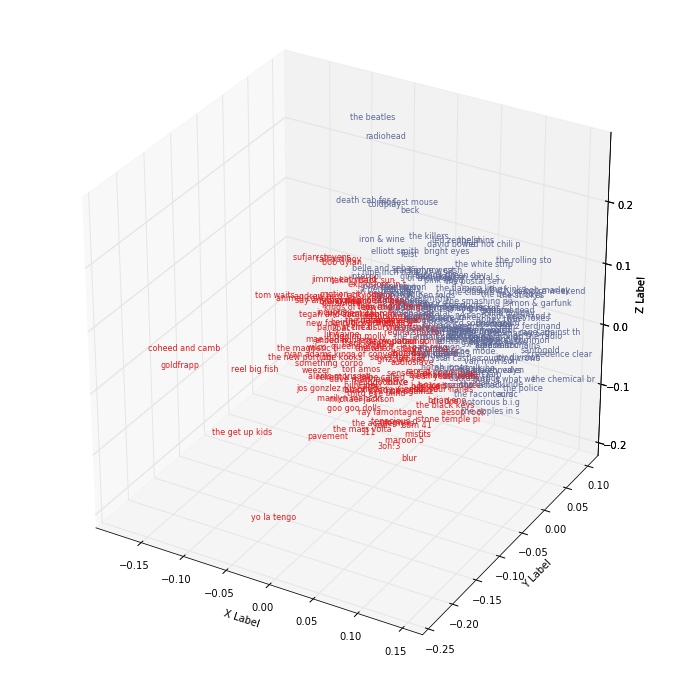

In [88]:
clf.plot_embedding(3, col_names=list(df_ss.index), cluster_list = [2])

In [29]:
df_ss.ix[df_ss.index.str.match('destinys child'),:]

count  mean          std  min   25%  50%     75%   max  \
destinys child      4  1483  2913.430509    3  13.5   38  1507.5  5853   

                   skew  kurtosis  
destinys child  1.61278  3.030904

In [80]:
df_ss = SummaryStats(df_piv, kurtosis = True, skew = True, axis = 0)
pca = SparsePCA(n_components=3, alpha = 1)
clf = DRPC(cluster_model=False, model = pca)
clf.fit(df_ss.fillna(0).values, names = list(df_ss.columns))
clf.components()

1          2          3
count      0.000000   0.000000  21.904248
mean      19.953068   4.229241   0.000000
std       21.571294  -7.870025  -1.614934
min       15.640987   8.849767   0.000000
25%       16.554944   8.418518   0.000000
50%       17.631318   7.461112   0.000000
75%       19.218849   4.813025   0.000000
max       22.411699  -6.274678   0.000000
skew       0.000000 -21.378793   0.169757
kurtosis   0.000000 -21.021531   0.213797

For n_clusters = 2 The average silhouette_score is : 0.305133973123


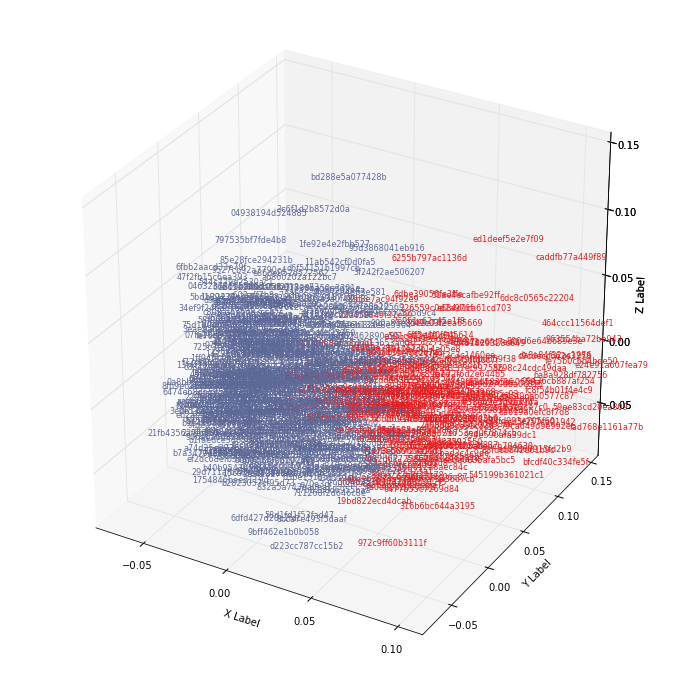

In [82]:
clf.plot_embedding(3, col_names=list(df_ss.index), cluster_list = [2])

In [79]:
#df_piv = df_piv.T.dropna(thresh= 20).T
df_piv = df_piv[df_piv < 1000].dropna(thresh = 20, axis = 0).dropna(thresh=20, axis = 1)

In [149]:
pca = SparsePCA(n_components=8, alpha = 3)
clf = DRPC(cluster_model=False, model = pca)
clf.fit(df_piv.fillna(0).values, names = list(df_piv.columns))

DRPC(cluster_model=False,
   model=SparsePCA(U_init=None, V_init=None, alpha=3, max_iter=1000, method='lars',
     n_components=8, n_jobs=1, random_state=None, ridge_alpha=0.01,
     tol=1e-08, verbose=False),
   scaler=StandardScaler(copy=True, with_mean=True, with_std=True),
   thresh=0.5)

For n_clusters = 3 The average silhouette_score is : 0.335820968059


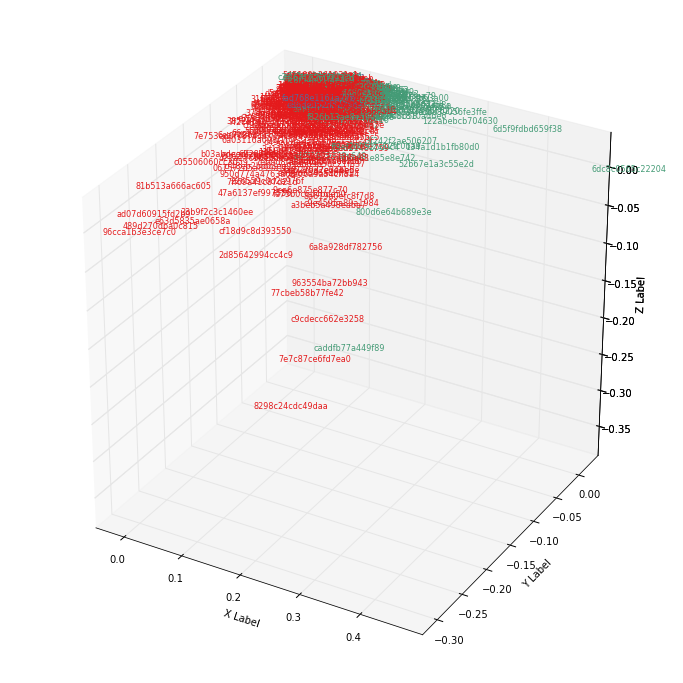

In [155]:
clf.plot_embedding(3, col_names=list(df_piv.index), cluster_list = [3])

In [150]:
df_cp = clf.components()

In [153]:
df_cp.sort(2, ascending= True)

1          2         3         4          5  \
paramore                   0.000000 -11.950982  0.000000  0.000000   0.000000   
motion city soundtrack     0.000000 -11.658178  0.000000  0.000000   0.000000   
fall out boy               0.000000 -11.306556  0.000000  0.000000   0.000000   
say anything               0.000000 -10.632316  0.000000  0.000000   0.000000   
cartel                     0.000000  -9.998468  0.000000  0.000000   0.000000   
the academy is...          0.000000  -9.582837  0.000000  0.000000   0.000000   
taking back sunday         0.000000  -9.545469  0.000000  0.000000   0.000000   
anberlin                   0.000000  -9.396046  0.000000  0.000000   0.000000   
brand new                  0.000000  -8.612595  0.000000  0.000000   0.000000   
thrice                     0.000000  -8.333813  0.000000  0.000000   0.000000   
new found glory            0.000000  -7.571123  0.000000  0.000000   0.000000   
senses fail                0.000000  -7.269813  0.000000  0.000000   0.000000   
cute is what we aim for    0.000000  -7.239973  0.000000  0.000000   0.000000   
relient k                  0.000000  -6.457702 -1.475830  0.000000   0.000000   
the used                   0.000000  -6.194343  0.000000  0.000000   0.000000   
hellogoodbye               0.000000  -6.193451 -4.503093  0.000000   0.000000   
mae                        0.000000  -6.186261  0.000000  0.000000   0.000000   
panic at the disco         0.000000  -6.029898  0.000000  0.000000   0.000000   
circa survive              0.000000  -5.637302  0.000000  0.000000   0.000000   
dashboard confessional     0.000000  -5.417078 -2.158221  0.000000   0.000000   
blink-182                  0.000000  -5.108777  0.000000  0.000000   0.000000   
something corporate        0.000000  -4.871206 -6.385811  0.000000   0.000000   
the get up kids            0.000000  -4.698047  0.000000  0.000000   0.000000   
mindless self indulgence   0.000000  -4.361488  0.000000  0.000000   0.000000   
sum 41                     0.000000  -4.108662  0.000000  0.000000   0.000000   
coheed and cambria         0.000000  -4.089199  0.000000  0.000000   0.000000   
jimmy eat world            0.000000  -3.798821 -7.711627  0.000000   0.000000   
saves the day              0.000000  -3.531200  0.000000  0.000000   0.000000   
thursday                   0.000000  -3.310107  0.000000  0.000000   0.000000   
my chemical romance        0.000000  -2.303647  0.000000  0.000000   0.000000   
...                             ...        ...       ...       ...        ...   
devendra banhart           5.282796   0.000000  0.000000  0.000000   0.000000   
dr. dre                    0.000000   0.000000  0.000000  0.000000 -12.517554   
elliott smith              0.000000   0.000000  0.000000 -1.584815   0.000000   
eminem                     0.000000   0.000000  0.000000  0.000000  -5.780567   
evanescence                0.000000   0.000000  0.000000  0.000000   0.000000   
explosions in the sky      3.528304   0.000000  0.000000  0.000000   0.000000   
feist                      1.676865   0.000000  0.000000  0.000000   0.000000   
fiona apple                0.000000   0.000000  0.000000  0.000000   0.000000   
fleet foxes               12.341774   0.000000  0.000000  0.000000   0.000000   
flight of the conchords    0.000000   0.000000  0.000000  0.000000   0.000000   
flogging molly             0.000000   0.000000  0.000000  0.000000   0.000000   
foo fighters               0.000000   0.000000 -9.006747  0.000000   0.000000   
frank sinatra              0.000000   0.000000  0.000000  0.000000   0.000000   
jason mraz                 0.000000   0.000000 -7.055042  0.000000   0.000000   
franz ferdinand            0.000000   0.000000  0.000000  0.000000   0.000000   
girl talk                  0.000000   0.000000  0.000000  0.000000  -1.027734   
gnarls barkley             0.000000   0.000000  0.000000  0.000000  -0.860940   
goldfrapp                  0.000000   0.000000  0.000000  0.00000

In [154]:
df_cp.corr()

1         2         3         4         5         6         7  \
1  1.000000  0.150054  0.128763  0.091698  0.102878  0.054669 -0.114162   
2  0.150054  1.000000 -0.023251 -0.111572 -0.081004 -0.102528  0.087932   
3  0.128763 -0.023251  1.000000 -0.118086 -0.085733 -0.108513  0.058422   
4  0.091698 -0.111572 -0.118086  1.000000 -0.076495 -0.077046  0.079992   
5  0.102878 -0.081004 -0.085733 -0.076495  1.000000 -0.065769  0.041016   
6  0.054669 -0.102528 -0.108513 -0.077046 -0.065769  1.000000  0.072895   
7 -0.114162  0.087932  0.058422  0.079992  0.041016  0.072895  1.000000   
8  0.109743 -0.095630 -0.062015 -0.040468 -0.059901 -0.029232  0.072565   

          8  
1  0.109743  
2 -0.095630  
3 -0.062015  
4 -0.040468  
5 -0.059901  
6 -0.029232  
7  0.072565  
8  1.000000